## Importing Libraries & API Key

In [1]:
# youtube API key
with open('apikey.txt') as file:
    ytAPI_key = file.read()

In [2]:
# import library
from googleapiclient.discovery import build

In [3]:
# import usual libraries
import numpy as np
import pandas as pd

# to see entire output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [124]:
# plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer

In [137]:
# readability analysis library
from readability import Readability

In [171]:
# to make a fun word cloud viz
from wordcloud import WordCloud, STOPWORDS

### Getting Youtube Comments

In [9]:
# defining funtion to collect youtube video comments

def get_comments(videoID):
    youtube = build('youtube', 'v3', developerKey=ytAPI_key)

    request = youtube.commentThreads().list(
        part='snippet',
        videoId=videoID,
        maxResults=100
    )

    response = request.execute()

    comments = []

    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([
            comment['authorDisplayName'],
            comment['publishedAt'],
            comment['updatedAt'],
            comment['likeCount'],
            comment['textDisplay']
        ])

    df = pd.DataFrame(comments, columns=['author', 'published', 'updated', 'like_count', 'text'])
    return df


In [53]:
def analyze_column(text):
    # Removing all the weblinks
    text = text[~text.str.contains('href')]
    
    # Tokenize alphanumeric characters and drop anything else
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_text = text.str.lower().apply(tokenizer.tokenize)
    
    # Flatten the list of tokens
    all_tokens = [token for filtered_tokens in tokenized_text for token in filtered_tokens]
    
    # Remove stop words
    tokens = [token for token in all_tokens if token not in stopwords.words('english')]

    # Create a frequency distribution
    freq_dist = FreqDist(tokens)
    
    return freq_dist

In [28]:
HZ = get_comments('m6pw0GlI0RI')

In [74]:
BG = get_comments('85Ex8_r5uSs')

In [75]:
HL = get_comments('jpMtxS5-2oQ')

In [76]:
GC = get_comments('ry6XKZJ98LE')

In [77]:
JJ = get_comments('RJuT4YDPQIs')

In [79]:
YM = get_comments('koWinhVdFsk')

In [78]:
snap = get_comments('aU5IWbFENfc')

#### creating one big series of all comments

In [81]:
df_list = [HZ, BG, HL, GC, JJ, YM, snap]

In [82]:
concat_df = pd.concat(df_list)

In [83]:
total_comments = concat_df[['text']]

In [85]:
total_comments.shape

(543, 1)

#### creating a list of Gen Alpha / Zalpha slang

In [109]:
slang = ['sigma', 'rizz', 'rizzler', 'ohio', 'gyatt', 'fanum', 'skibidi', 'brainrot', 'brain', 'bro', 'ate',
         'ship', 'slay', 'sus', 'pin', 'preppy', 'mewing', 'grimace', 'naw', 'aura', 'fell', 'blud', 'lvl', 'level', 
         'prepyyyyyy', 'gurl','baddie', 'slayyyyyyyyyy', 'slayyyyyyyyyyyyyy',
         'suss','tik','tok', 'alpha', 'alfa', 'até', 'baddy', 'baddies', 'bros', 'broski',
         'brouh', 'bruhhhhhhhhhh', 'clout', 'cooked', 'cringe', 'f', 'fanumtaxed', 'gayatt',
         'girly', 'girlit', 'ick', 'instructions', 'nah', 'rizzz', 'risler', 'rissler', 'rizzeler',
         'scibady', 'skibbidi', 'skibdy', 'skibiby', 'skidi', 'skibidi']

In [110]:
slang = sorted(slang)

In [111]:
slang

['alfa',
 'alpha',
 'ate',
 'até',
 'aura',
 'baddie',
 'baddies',
 'baddy',
 'blud',
 'brain',
 'brainrot',
 'bro',
 'bros',
 'broski',
 'brouh',
 'bruhhhhhhhhhh',
 'clout',
 'cooked',
 'cringe',
 'f',
 'fanum',
 'fanumtaxed',
 'fell',
 'gayatt',
 'girlit',
 'girly',
 'grimace',
 'gurl',
 'gyatt',
 'ick',
 'instructions',
 'level',
 'lvl',
 'mewing',
 'nah',
 'naw',
 'ohio',
 'pin',
 'preppy',
 'prepyyyyyy',
 'risler',
 'rissler',
 'rizz',
 'rizzeler',
 'rizzler',
 'rizzz',
 'scibady',
 'ship',
 'sigma',
 'skibbidi',
 'skibdy',
 'skibiby',
 'skibidi',
 'skibidi',
 'skidi',
 'slay',
 'slayyyyyyyyyy',
 'slayyyyyyyyyyyyyy',
 'sus',
 'suss',
 'tik',
 'tok']

#### text normalization

In [113]:
slang_buckets = {
    'bro': ['bro', 'bros', 'broski', 'brouh', 'bruhhhhhhhhhh', 'blud'],
    'alpha': ['alfa', 'alpha'],
    'baddie': ['baddie', 'baddies', 'baddy'],
    'ate': ['ate', 'até'],
    'brainrot': ['rot', 'brain', 'brains'],
    'fanum-tax': ['fanum', 'fanumtaxed'],
    'gyatt': ['gayatt', 'gyatt'],
    'girlie': ['girlit', 'girly', 'gurl'],
    'level': ['level', 'lvl'],
    'nah': ['nah', 'naw'],
    'preppy': ['preppy', 'prepyyyyyy'],
    'rizz': ['rizz', 'risler', 'rissler', 'rizzeler', 'rizzler', 'rizzz'],
    'skibidi': ['skibidi', 'scibady', 'skibbidi', 'skibdy', 'skibiby', 'skibidi', 'skibidi', 'skidi'],
    'slay': ['slay', 'slayyyyyyyyyy', 'slayyyyyyyyyyyyyy'],
    'sus': ['sus', 'suss'],
    'tiktok': ['tik', 'tok']
}

#### testing the functions 

In [49]:
HZ_com = analyze_column(HZ['text'])

In [64]:
HZ_com.most_common()

[('harper', 18),
 ('dupe', 15),
 ('dupes', 9),
 ('hi', 9),
 ('think', 8),
 ('love', 8),
 ('bye', 8),
 ('like', 7),
 ('better', 6),
 ('funny', 6),
 ('look', 5),
 ('side', 5),
 ('u', 4),
 ('maddox', 4),
 ('cheap', 4),
 ('elf', 4),
 ('br', 4),
 ('powder', 4),
 ('blush', 4),
 ('ur', 3),
 ('know', 3),
 ('39', 3),
 ('lol', 3),
 ('b', 3),
 ('idk', 3),
 ('much', 3),
 ('girl', 3),
 ('new', 3),
 ('video', 3),
 ('please', 3),
 ('lot', 2),
 ('mcobeauty', 2),
 ('would', 2),
 ('best', 2),
 ('gurl', 2),
 ('day', 2),
 ('plz', 2),
 ('btw', 2),
 ('hair', 2),
 ('xx', 2),
 ('win', 2),
 ('reason', 2),
 ('years', 2),
 ('thinks', 2),
 ('n', 2),
 ('singer', 2),
 ('bosten', 2),
 ('actually', 2),
 ('benefit', 2),
 ('lash', 2),
 ('mean', 1),
 ('hey', 1),
 ('getting', 1),
 ('bullied', 1),
 ('school', 1),
 ('send', 1),
 ('tips', 1),
 ('help', 1),
 ('waaiiittt', 1),
 ('sus', 1),
 ('soo', 1),
 ('prepyyyyyy', 1),
 ('fhddgdd', 1),
 ('dont', 1),
 ('sold', 1),
 ('texas', 1),
 ('make', 1),
 ('honestly', 1),
 ('good', 1),

In [65]:
sorted(HZ_com)

['0',
 '14',
 '2',
 '39',
 '5',
 'actually',
 'also',
 'always',
 'amazing',
 'amp',
 'anderson',
 'animal',
 'anyway',
 'ate',
 'b',
 'bad',
 'baddie',
 'beautiful',
 'beauty',
 'benefit',
 'best',
 'better',
 'biggest',
 'blending',
 'blush',
 'bosten',
 'br',
 'brenda',
 'bro',
 'bronze',
 'btw',
 'bullied',
 'burp',
 'bye',
 'called',
 'cheap',
 'clark',
 'clone',
 'close',
 'collab',
 'colour',
 'comment',
 'commenting',
 'content',
 'could',
 'crush',
 'darker',
 'day',
 'def',
 'different',
 'dog',
 'dont',
 'doop',
 'dope',
 'dopeee',
 'drops',
 'du',
 'dude',
 'dupe',
 'dupeeeee',
 'dupes',
 'elf',
 'excited',
 'expensive',
 'face',
 'fan',
 'favorite',
 'fhddgdd',
 'formula',
 'found',
 'freaking',
 'friend',
 'full',
 'fun',
 'funny',
 'funnyyyy',
 'get',
 'getting',
 'girl',
 'girlit',
 'good',
 'got',
 'gurl',
 'hahahahahaaaaaaa',
 'hair',
 'hall',
 'hand',
 'harper',
 'hate',
 'heard',
 'help',
 'herd',
 'hes',
 'hey',
 'hi',
 'hiiii',
 'honestly',
 'huda',
 'hurt',
 'idk

In [72]:
word_to_find = 'hi'
frequency = HZ_com[word_to_find]
print(f"The word '{word_to_find}' appears {frequency} times.")

The word 'hi' appears 9 times.


### Frequency Analysis

In [87]:
comments = analyze_column(total_comments['text'])

In [89]:
len(comments)

1078

In [90]:
comments.most_common()

[('br', 62),
 ('love', 54),
 ('like', 39),
 ('39', 36),
 ('bro', 25),
 ('u', 24),
 ('room', 21),
 ('sigma', 20),
 ('got', 19),
 ('get', 19),
 ('harper', 18),
 ('grade', 18),
 ('lol', 17),
 ('girl', 17),
 ('hayley', 17),
 ('dupe', 15),
 ('think', 15),
 ('ur', 14),
 ('know', 14),
 ('rizz', 14),
 ('hero', 14),
 ('jules', 14),
 ('beautiful', 13),
 ('hi', 13),
 ('video', 13),
 ('rizzler', 13),
 ('quot', 13),
 ('even', 13),
 ('alpha', 13),
 ('funny', 12),
 ('new', 12),
 ('2', 12),
 ('cute', 11),
 ('1', 11),
 ('look', 10),
 ('would', 10),
 ('one', 10),
 ('much', 10),
 ('need', 10),
 ('slay', 10),
 ('dupes', 9),
 ('better', 9),
 ('hair', 9),
 ('see', 9),
 ('please', 9),
 ('way', 9),
 ('videos', 9),
 ('guys', 9),
 ('im', 9),
 ('skibidi', 9),
 ('make', 8),
 ('good', 8),
 ('meet', 8),
 ('preppy', 8),
 ('bye', 8),
 ('amazing', 8),
 ('back', 8),
 ('long', 8),
 ('girls', 8),
 ('hey', 7),
 ('could', 7),
 ('really', 7),
 ('cool', 7),
 ('wait', 7),
 ('gen', 7),
 ('us', 7),
 ('best', 6),
 ('day', 6),
 (

In [112]:
frequency_slang = {word: comments[word] for word in slang}
frequency_slang

{'alfa': 1,
 'alpha': 13,
 'ate': 3,
 'até': 1,
 'aura': 1,
 'baddie': 1,
 'baddies': 5,
 'baddy': 1,
 'blud': 1,
 'brain': 1,
 'brainrot': 1,
 'bro': 25,
 'bros': 3,
 'broski': 1,
 'brouh': 1,
 'bruhhhhhhhhhh': 1,
 'clout': 1,
 'cooked': 1,
 'cringe': 2,
 'f': 1,
 'fanum': 2,
 'fanumtaxed': 1,
 'fell': 1,
 'gayatt': 1,
 'girlit': 1,
 'girly': 1,
 'grimace': 1,
 'gurl': 3,
 'gyatt': 2,
 'ick': 1,
 'instructions': 1,
 'level': 1,
 'lvl': 1,
 'mewing': 2,
 'nah': 1,
 'naw': 1,
 'ohio': 2,
 'pin': 3,
 'preppy': 8,
 'prepyyyyyy': 1,
 'risler': 1,
 'rissler': 1,
 'rizz': 14,
 'rizzeler': 1,
 'rizzler': 13,
 'rizzz': 1,
 'scibady': 1,
 'ship': 1,
 'sigma': 20,
 'skibbidi': 1,
 'skibdy': 1,
 'skibiby': 1,
 'skibidi': 9,
 'skidi': 3,
 'slay': 10,
 'slayyyyyyyyyy': 1,
 'slayyyyyyyyyyyyyy': 1,
 'sus': 1,
 'suss': 1,
 'tik': 1,
 'tok': 1}

In [114]:
# Initialize a new dictionary for normalized frequencies
normalized_frequency = {}

# Aggregate counts into the canonical terms
for canonical, variations in slang_buckets.items():
    frequency_sum = sum(frequency_slang.get(variation, 0) for variation in variations)
    normalized_frequency[canonical] = frequency_sum
    
# Copy unbucketed terms to the normalized_frequency dictionary
for term, count in frequency_slang.items():
    if not any(term in variations for variations in slang_buckets.values()):
        normalized_frequency[term] = count

In [115]:
normalized_frequency

{'bro': 32,
 'alpha': 14,
 'baddie': 7,
 'ate': 4,
 'brainrot': 1,
 'fanum-tax': 3,
 'gyatt': 3,
 'girlie': 5,
 'level': 2,
 'nah': 2,
 'preppy': 9,
 'rizz': 31,
 'skibidi': 34,
 'slay': 12,
 'sus': 2,
 'tiktok': 2,
 'aura': 1,
 'clout': 1,
 'cooked': 1,
 'cringe': 2,
 'f': 1,
 'fell': 1,
 'grimace': 1,
 'ick': 1,
 'instructions': 1,
 'mewing': 2,
 'ohio': 2,
 'pin': 3,
 'ship': 1,
 'sigma': 20}

In [211]:
len(normalized_frequency)

30

In [119]:
sum(normalized_frequency.values())

201

In [212]:
sum(comments.values())

2558

In [213]:
# percentage slang
round(sum(normalized_frequency.values())/sum(comments.values()),3)*100

7.9

In [130]:
sorted_frequency = dict(sorted(normalized_frequency.items(), key=lambda item: item[1], reverse=True))

In [132]:
sorted_frequency

{'skibidi': 34,
 'bro': 32,
 'rizz': 31,
 'sigma': 20,
 'alpha': 14,
 'slay': 12,
 'preppy': 9,
 'baddie': 7,
 'girlie': 5,
 'ate': 4,
 'fanum-tax': 3,
 'gyatt': 3,
 'pin': 3,
 'level': 2,
 'nah': 2,
 'sus': 2,
 'tiktok': 2,
 'cringe': 2,
 'mewing': 2,
 'ohio': 2,
 'brainrot': 1,
 'aura': 1,
 'clout': 1,
 'cooked': 1,
 'f': 1,
 'fell': 1,
 'grimace': 1,
 'ick': 1,
 'instructions': 1,
 'ship': 1}

In [135]:
dict(list(sorted_frequency.items())[:10])

{'skibidi': 34,
 'bro': 32,
 'rizz': 31,
 'sigma': 20,
 'alpha': 14,
 'slay': 12,
 'preppy': 9,
 'baddie': 7,
 'girlie': 5,
 'ate': 4}

### Slang Histogram & Word Cloud

/var/folders/ns/cnr3tjln5ns_6pvq3ylpgl9m0000gn/T/ipykernel_77266/25745462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Words', y='Counts', data=freq_data, palette='gist_rainbow')


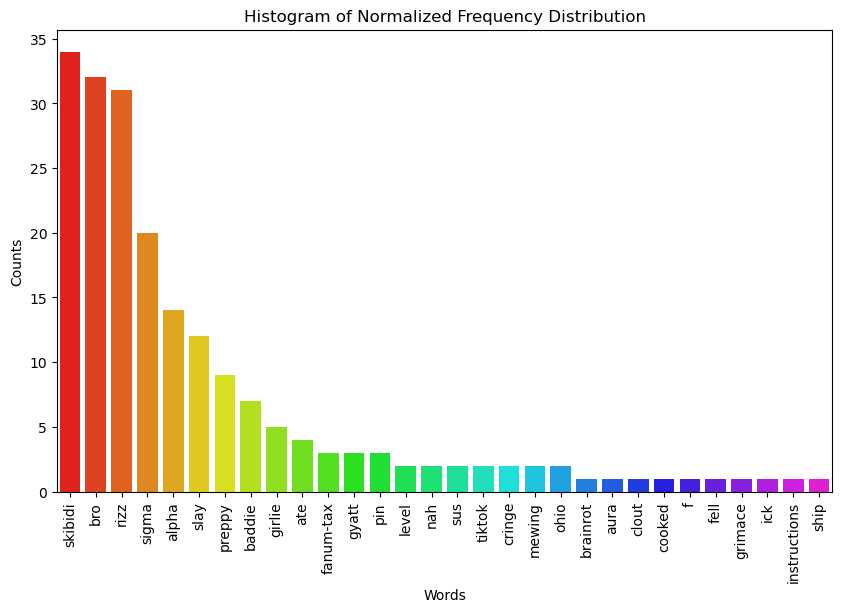

In [204]:
# Extract data for plotting
words = list(normalized_frequency.keys())
counts = list(normalized_frequency.values())

# Convert sorted data to DataFrame
freq_data = pd.DataFrame({'Words': list(sorted_frequency.keys()), 'Counts': list(sorted_frequency.values())})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Words', y='Counts', data=freq_data, palette='gist_rainbow')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Histogram of Normalized Frequency Distribution')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()

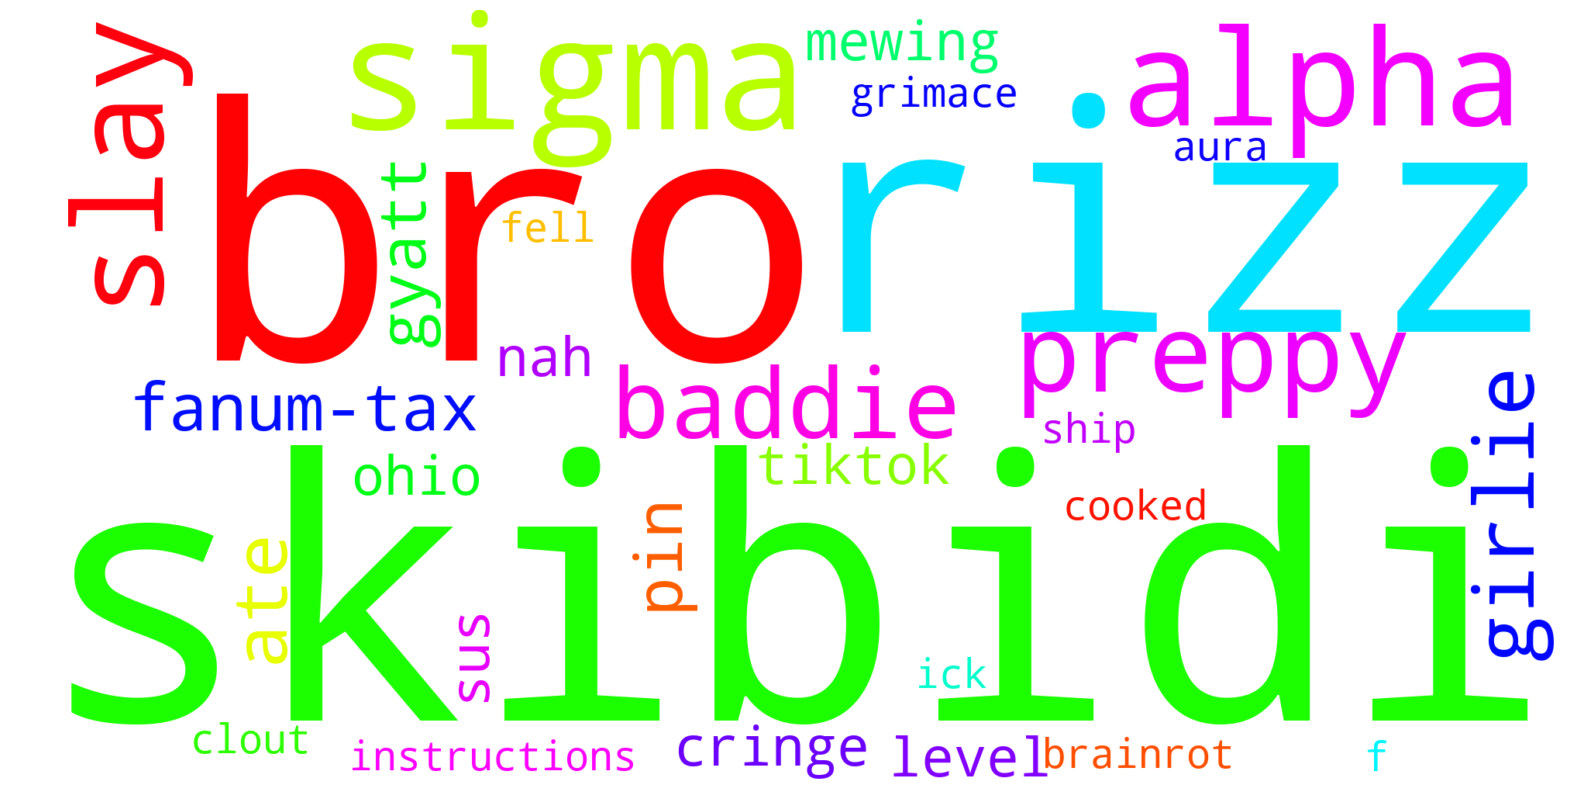

In [203]:
wordcloud = WordCloud(width=2000, height=1000, random_state=1, 
                      background_color='white', colormap='gist_rainbow',
                      collocations=False, stopwords=STOPWORDS).generate_from_frequencies(normalized_frequency)

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordcloud.png')
    plt.show()

plot_cloud(wordcloud)

### Readability Analysis
- had to join all the comments together b/c for the analysis to run it has to pass the minimum threshold of 100 words

In [158]:
". ".join(total_comments['text'])

'U mean dupe. <a href="https://www.youtube.com/watch?v=m6pw0GlI0RI&amp;t=60">1:00</a>😂. Hey Harper, I’ve been getting bullied a lot at school so can you send me some tips to help?. dupe. waaiiittt why do u look sus?!?!?,. Ur soo prepyyyyyy. Fhddgdd😂. i dont know if Mcobeauty is sold in Texas but if it was they would make the best dupes but honestly they are good. Do you have a crush on Maddox&#39;s. Is it bad I think dupes lol. The cheap is better😂❤. The doop side❤. What did Piper Rockelle do to you?. Elf is no a dupe gurl. Dupe is better ❤. <b>*BuRp*</b>. Day 5 of commenting on ur vids! So can we plz do a collab I think it would be rlly fun we can do whatever vid u want just plz😢❤❤. Harper is so funny 😂. At <a href="https://www.youtube.com/watch?v=m6pw0GlI0RI&amp;t=389">6:29</a> I’m about to say words I should say 😊 was so funny. My dog got scared when you screamed 😂. I think I just found a redheaded clone of myself. Dude. <a href="https://www.youtube.com/watch?v=m6pw0GlI0RI&amp;t=478

In [163]:
comments_concatenated = ". ".join(total_comments['text'])

In [165]:
readability = Readability(comments_concatenated)

In [166]:
readability.spache().score

5.780288696370514

In [168]:
readability.flesch_kincaid().score

2.938566684881309

#### What does...
... a Spache score of 5.7 mean?
- A score of 5.780 suggests that the text is at the reading level of a student in the 5th grade, towards the end of the school year (approximately 5th grade, 8th month). 
- Essentially, a typical 5th grader, around the age of 10-11, should be able to read and comprehend this text without significant difficulty.

... a Flesch-Kincaid score of 2.9 mean?
- A score of 2.9 means that a typical student in the 2nd grade, during the 9th month (close to the end of the school year), should be able to read and understand the content. 
- Essentially, a 2nd grader, around the age of 7-8 years old, should not have significant difficulty with the text.

#### What was the average comment length?

In [ ]:
# rs_df was defined earlier when playing around with the readablility scores
# rs_df = total_comments

In [184]:
# Function to count number of words
def count_words(text):
    return len(text.split())

In [182]:
rs_df = rs_df[~rs_df['text'].str.contains('href', na=False)]
rs_df = rs_df[~rs_df['text'].str.contains('>', na=False)]

In [190]:
# Apply the function to the 'text' column
rs_df['word_count'] = rs_df['text'].apply(count_words)

In [191]:
rs_df

,text,word_count
0,U mean dupe,3
2,"Hey Harper, I’ve been getting bullied a lot at school so can you send me some tips to help?",19
3,dupe,1
4,"waaiiittt why do u look sus?!?!?,",6
5,Ur soo prepyyyyyy,3
6,Fhddgdd😂,1
7,i dont know if Mcobeauty is sold in Texas but if it was they would make the best dupes but honestly they are good,24
8,Do you have a crush on Maddox&#39;s,7
9,Is it bad I think dupes lol,7
10,The cheap is better😂❤,4


In [193]:
rs_df['word_count'].describe()

count    504.000000
mean       8.295635
std        9.191031
min        1.000000
25%        3.000000
50%        6.000000
75%       10.000000
max      114.000000
Name: word_count, dtype: float64

In [207]:
rs_df[rs_df['word_count'] == 1]

,text,word_count
3,dupe,1
6,Fhddgdd😂,1
21,Dude,1
27,Hiiii,1
29,Dupeeeee,1
32,Dupes,1
37,Dupes,1
41,😍🥰😘👛,1
57,Hahahahahaaaaaaa,1
69,LMAOOOOOO,1


In [208]:
rs_df[rs_df['word_count'] == 114]

,text,word_count
64,"I see they don’t ever mention Livvy Dunn anymore. I’m guessing they were threatened with some legal charges considering how long and how far they took things with her name and how creepy they got. Now he’s all about being a manipulative little splat towards “baddies”… “baddies, tell me you love me”… “baddies, breakup with your bf if you really love me”… “baddies, if you don’t love me more than you love your parents, your not my baddy”.. “baddies, I’m sad, tell me you love me”… just the most cringe, clout hungry kid on the web. Can’t wait till he completely falls off. The kid eats like a slob too. Just FARTS AND KETCHUP!!!",114
